<a href="https://colab.research.google.com/github/sdfjslfjafkdl/Deep-Learning-Base-5/blob/main/step04/step04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 불러오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 우리 주변의 다봉 분포

### 다봉 분포 데이터셋

In [3]:
xs = np.loadtxt('old_faithful.txt')
print(xs.shape)
print(xs[0])
# 분출 시간이 3.6분, 다음 분출까지의 간격이 79분이라는 뜻

(272, 2)
[ 3.6 79. ]


## 가우스 혼합 모델 데이터 생성

### GMM(가우스 혼합 모델)을 따르는 데이터 생성

In [4]:
# 학습된 매개변수
mus = np.array([[2.0, 54.50], # 두 개 정규분포의 평균벡터들 모음
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], # 두 개 정규분포의 공분산행렬들 모음
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00]]])
phis = np.array([0.35, 0.65]) # 각 정규분포가 선택될 확률

In [5]:
def sample(): # 매개변수들을 참조하여 샘플링 진행하는 함수
  z = np.random.choice(2, p = phis) # 각 정규분포가 선택될 확률 매개변수 phis 대로 정규분포 선택
  mu, cov = mus[z], covs[z]
  x = np.random.multivariate_normal(mu, cov) # 다변량 정규분포에서 임의의 데이터 하나를 샘플링
  return x

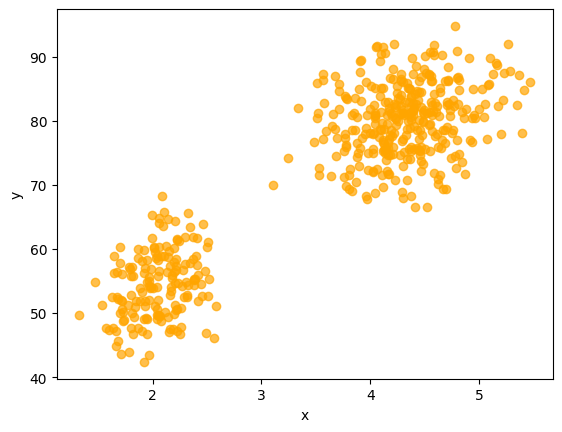

In [6]:
# 데이터 500개를 추출하여 산점도를 그리는 코드
N = 500
xs = np.zeros((N, 2))

for i in range(N):
  xs[i] = sample()

plt.scatter(xs[:,0], xs[:,1], color = 'orange', alpha = 0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 가우스 혼합 모델의 수식

### GMM 구현

In [12]:
# 다변량 정규분포
def multivariate_normal(x, mu, cov):
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  d = len(x)
  z = 1 / np.sqrt((2 * np.pi) ** d * det)
  y = z * np.exp((x - mu).T @ inv @ (x - mu) / (-2.0))
  return y

In [13]:
# gmm
def gmm(x, mus, covs, phis):
  K = len(phis)
  y = 0
  for i in range(K):
    mu, cov, phi = mus[i], covs[i], phis[i] # 매개변수 추출
    y += phi * multivariate_normal(x, mu, cov) # 정규 분포의 가중합
  return y

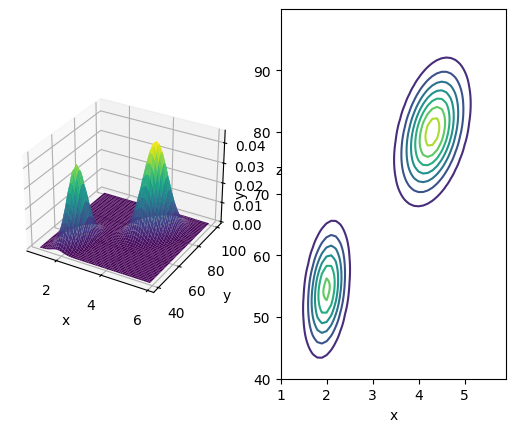

In [14]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, mus, covs, phis)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()